# Big Mart Sales

## INTRODUCTION

Big Market is a big supermarket chain, with stores all around the country.The data scientists at Big Mart have collected 2013 sales data for 1559 products across 10 stores in different cities. With the Information provided We'll make an EDA report to understand the properties of products and stores which play a key role in increasing sales and use the Information to take the correct measures which could help their business to grow.

### DATA DESCRIPTION

#### The dataset has 8523 entries with 12 columns. The description of each column is given below.

**Item_Identifier**:    Unique Product ID

**Item_Weight**   :  Weight Of Item

**Item_Fat_Content**: Whether the product is low fat or not

**Item_Visibility** :  The % of total display are of all products in a store allocated to a particular product

**Item_Type** :  The  category to which the product belongs

**Item MRP**  :  Maximum Retail Price(List Price) Of the Product

**Outlet_Identifier** :  Unique store ID

**Outlet_Establishment_Year** : The year in which the Store was established

**Outlet_Size** : The size of the store in terms Of Ground Area Covered

**Outlet_Location_Type** : The type of city in which store is located

**Outlet_Type** : Whether the outlet is just a grocery store or some sort  of supermarket

**Item_Outlet_Sales** : Sales of the product in a particular store. This is the value of the outcome variable to be predicted.

Let us start importing the common libraries that will be used in the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### General Overview Of the dataset
##### Now I will read Big Mart Sales dataset using Pandas read_csv method and explore first five rows of the dataset

In [2]:
### Reading the Big Mart Sales Dataset
df = pd.read_csv("F:\Big-Mart-Sales\Big_mart.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
### Finding the number of rows and columns in the dataset
df.shape

(8523, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [5]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

### Let us see the summary of the dataset

In [6]:
#Summary of the dataset
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


The above stats tells us a lot about the dataset. As we can see that , the maximum weight of a product is 21.35 ,
maximum MRP  is  266.88 , the highest establishment year of the outlet is 2009 and the maximum Item outlet sales is 13086.96.

Also we note that on average , the item weight is 12.85  , MRP is  141 and the Item outlet sales is 2181.28.

##### Let us assume that Columns like Item_Identifier, Outlet_Identifiermake a least impact on Item_Outlet_Sales so we can remove these columns.

So now we have:-

In [7]:
df1 = df.drop(['Item_Identifier','Outlet_Identifier'] , axis = 1)
df1.head(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
### Let's have a look the Categorical Columns

categorical_columns = [x for x in df1.dtypes.index if df1.dtypes[x]=='object']


In [9]:
categorical_columns

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [10]:
continous_columns = [x for x in df1.dtypes.index if df1.dtypes[x]!='object']

In [11]:
continous_columns

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [12]:
for x in categorical_columns:
    
    print(x)
    print(df[x].value_counts())
    print('\n')

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: 

### Cheking the Dataset quality

Let's find the missing values first

In [13]:
# Finding the missing value in the dataset

missing_value = df.isnull().sum(axis=0).reset_index()
missing_value.columns = ['column_name', 'missing_count']
missing_value = missing_value[missing_value['missing_count']>0]
missing_value

,column_name,missing_count
1,Item_Weight,1463
8,Outlet_Size,2410


As we can check that there are 1463 null values for Item_Weight and 2410 null values for Outlet_Size.

## Data Cleaning & Preparation

There are some problems in our dataset on which we have to work upon.
1. Item_Visibilty has 0.0 but it has non-zero Item_Outlet_Sales
2. Item_Weight and Outlet_Size has null values.

Lets now work on our First Problem i.e. Item_Visibilty has 0.0 but it has non-zero Item_Outlet_Sales

In [14]:
df['Item_Visibility'].describe().to_frame()

,Item_Visibility
count,8523.000000
mean,0.066132
std,0.051598
min,0.000000
25%,0.026989
50%,0.053931
75%,0.094585
max,0.328391


We will Substitute the values that are 0 with average of its kind of Item_Type. That means firstly calculate the average of visibility of each item.

In [15]:
visibility_avg = df.pivot_table(values='Item_Visibility', index='Item_Type')
visibility_avg

,Item_Visibility
Item_Type,
Baking Goods,0.069169
Breads,0.066255
Breakfast,0.085723
Canned,0.068129
Dairy,0.072427
Frozen Foods,0.065645
Fruits and Vegetables,0.068513
Hard Drinks,0.064943
Health and Hygiene,0.055216


Now select the values that are 0.

In [16]:
missing_values = (df['Item_Visibility'] == 0)

Now substitute those values with their respective Item_Type

In [17]:
df.loc[missing_values,'Item_Visibility']= df.loc[missing_values,'Item_Type'].apply(lambda x: visibility_avg.at[x, 'Item_Visibility'])

In [18]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.068513,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.061322,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [19]:
sum(df['Item_Visibility'] == 0)

0

Now Our **Second** Problem

Item_Weight and Outlet_Size has null values.

In [20]:
df.Outlet_Size.value_counts(dropna=False).to_frame()

,Outlet_Size
Medium,2793
NaN,2410
Small,2388
High,932


Here we see that medium stores have the highest number of count. So, it may be very much possible that the missing values be comprised of mainly high and medium outlet size.

In [21]:
df.groupby('Outlet_Location_Type').Outlet_Size.value_counts(dropna=False).to_frame()

Outlet_Size
Outlet_Location_Type Outlet_Size             
Tier 1               Small               1458
                     Medium               930
Tier 2               NaN                 1855
                     Small                930
Tier 3               Medium              1863
                     High                 932
                     NaN                  555

Here we see that Tier3 contains the maximum number of stores and Tier2 have the maximum null values. So, those null values should contain again medium and high outlet size. As, high outlet size counts 932 and they all are in Tier3. And Tier3 don't have any small oultet size, so it's null values may comprise of that.

In [22]:
df.groupby('Outlet_Type').Outlet_Size.value_counts(dropna=False).to_frame()

Outlet_Size
Outlet_Type       Outlet_Size             
Grocery Store     NaN                  555
                  Small                528
Supermarket Type1 Small               1860
                  NaN                 1855
                  High                 932
                  Medium               930
Supermarket Type2 Medium               928
Supermarket Type3 Medium               935

Here we see that most of the stores are of Supermarket Type1.It's null values may consists of more number of medium and high sized stored.

From the above analysis we can see that most of the missing oulet size should comprise of Medium outlet size. Therefore, we can impute the null values with Medium(which is the mode too).

In [23]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0],inplace=True)

Now, let's impute the missing data for **Item_weight**.

We can impute the null values by average weight of each item type.

In [24]:
list_unique_items = df.Item_Type.unique()
mean_items = { i:df.loc[df.Item_Type==i,['Item_Weight']].mean() for i in list_unique_items}

In [25]:
for i, m in mean_items.items():
    df.loc[df['Item_Type']==i,['Item_Weight']] = df.loc[df['Item_Type']==i,['Item_Weight']].fillna(m);

In [26]:
df.isnull().sum().to_frame()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


There are no null values left in our data now.

## Deriving the new columns

In [27]:
### Deriving new column as Item_Type_Combined 
df['Item_Type_Combined'] = df['Item_Identifier'].apply(lambda x: x[0:2])

In [28]:
df['Item_Type_Combined'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Type_Combined, dtype: int64

So now we have found that there are mainly three types of Items
1. FD(Freeze Dried)
2. NC(Non- Consumable)
3. DR(Drinks)

In [29]:
df['Item_Type_Combined'] = df['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})

Let's seperate the column NC as it has high fat_content.

In [30]:
df.loc[df['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Consumable"

In [31]:
df['Item_Fat_Content'].value_counts()

Low Fat           3612
Regular           2889
Non-Consumable    1599
LF                 222
reg                117
low fat             84
Name: Item_Fat_Content, dtype: int64

In [32]:
### Deriving the Outlet_Years from the Outlet_Establishment_Year to know that since how many years restaurent has been opened.
### As the Supermarket data is from year 2013 so we subtract the Outlet_Establishment_Year from 2013 to get actual outlet years.

df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']
df['Outlet_Years'].describe().to_frame()

,Outlet_Years
count,8523.000000
mean,15.168133
std,8.371760
min,4.000000
25%,9.000000
50%,14.000000
75%,26.000000
max,28.000000


In [33]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.068513,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Consumable,0.061322,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


## UNIVARIATE ANALYSIS

Now we will be analyzing the distribution of the data and will try to find the inferences from different columns used in the dataset

#### Item_MRP

In [34]:
df['Item_MRP'].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

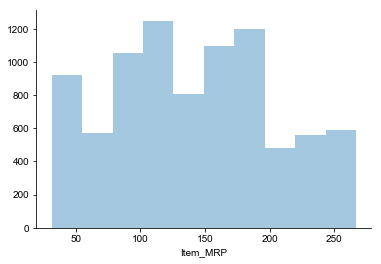

In [35]:
sns.distplot(df['Item_MRP'].dropna(), bins = 10, kde= False)
sns.set_style("dark",{'axes.grid' : True})
sns.despine()

From the above graph we can see that the minimum price of the item available in the store is around 20 and the maximum cost of the item is 270

#### Outlet_Location_Type

In [36]:
df['Outlet_Location_Type'].describe()

count       8523
unique         3
top       Tier 3
freq        3350
Name: Outlet_Location_Type, dtype: object

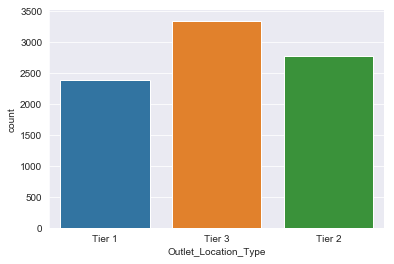

In [37]:
### Plotting the graph to find that in which loaction there are highest number of supermarkets. 
sns.countplot(df['Outlet_Location_Type'])
sns.set_style("whitegrid")
sns.despine()

We can clearly see that in **Tier 3** there are highest number of supermarkets.

#### Outlet_Size

In [38]:
df['Outlet_Size'].describe()

count       8523
unique         3
top       Medium
freq        5203
Name: Outlet_Size, dtype: object

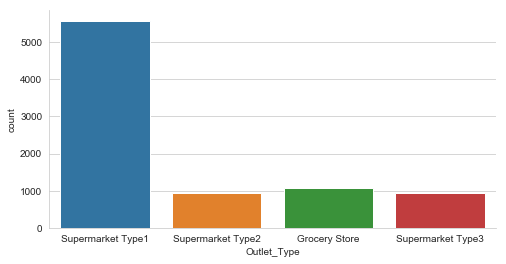

In [39]:
plt.subplots(figsize = (8,4))
sns.countplot(df['Outlet_Type'])
sns.despine()

We can observe that maximum number of outlets are **supermarket Type 1** and approximately there are equal number of **Supermarket Type2** and **Supermarket Type3**

#### Item_Fat_ Content

In [40]:
df['Item_Fat_Content'].describe()

count        8523
unique          6
top       Low Fat
freq         3612
Name: Item_Fat_Content, dtype: object

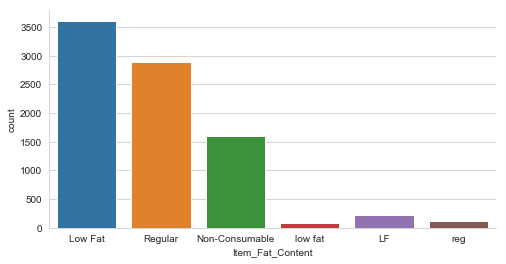

In [41]:
plt.subplots(figsize = (8,4))
sns.countplot(df['Item_Fat_Content'])
sns.despine()

There are mainly two categories under the **Item_Fat_Content** which includes Low Fat & Regular. But, some of ‘Low Fat’ values miscoded as ‘low fat’ and ‘LF’. Also, some of ‘Regular’ are mentioned as ‘reg’.

So let us reduce the anomolies which is present in our data.


In [42]:
### Removing the anamolies present in our data
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['low fat','LF'], 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['reg'], 'Regular')

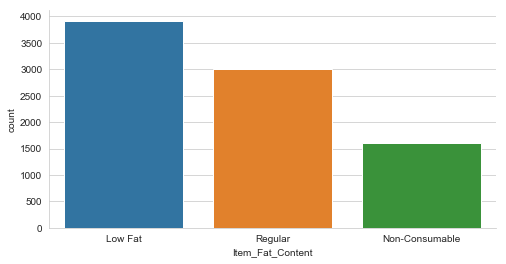

In [43]:
### Let us check the plot again now.

plt.subplots(figsize = (8,4))
sns.countplot(df['Item_Fat_Content'])
sns.despine()


Cool !!! Now **Item_Fat_Content** contains only two categories as 'Low Fat' and 'Regular'. We can find that there are more products with Low Fat than Regular

#### Item_Type

In [44]:
df['Item_Type'].describe()

count                      8523
unique                       16
top       Fruits and Vegetables
freq                       1232
Name: Item_Type, dtype: object

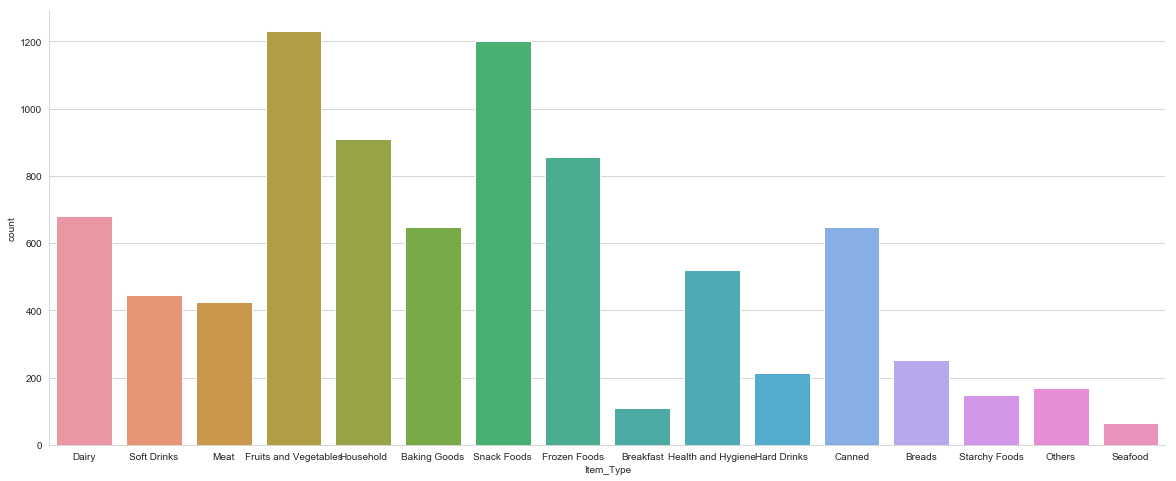

In [45]:
plt.figure(figsize=(20, 8))
sns.countplot(df['Item_Type'])
sns.set_style("whitegrid", {'axes.grid' : False})
sns.despine()

The above plot tells us about the different types of Items which are available in the store.
We can see that Fruits & Vegetables, Snack Foods have highest demand from all the products.


#### Item_Outlet_Sales

In [46]:
df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

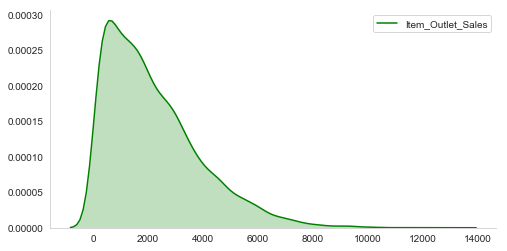

In [47]:
plt.subplots(figsize=(8,4))
sns.kdeplot(df['Item_Outlet_Sales'] , color = 'green', shade = True)
sns.despine()


We note that the maximum product sale is around 13086 and the average number of product sale is 2181

# Correlation Between Variables

#### It will be good to see how the variables are correlated before we jump to bivariate analysis as it will surely help us in further process.

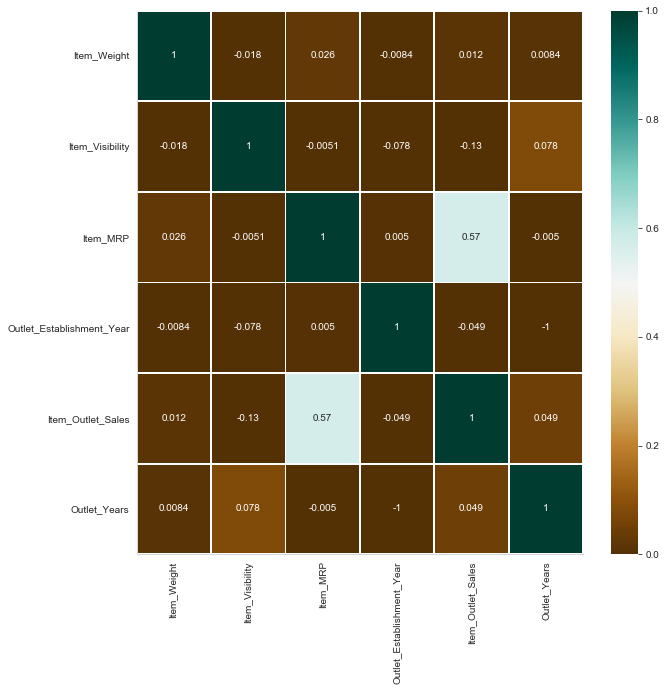

In [48]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), vmin=0, vmax=1,annot=True,cmap = 'BrBG',  linewidth=1, linecolor ='white')
sns.despine()

We can see that the Item_Outlet_Sales & Item_MRP have a strong correlation between them which is found to be 0.57

# BIVARIATE ANALYSIS

#### Now let's do some of the Bivariate Analysis on the given dataset

#### Item_MRP - Item_Outlet_Sales

In [49]:
### Summary of data for Item_MRP & Item_Outlet_Sales

df[['Item_MRP', 'Item_Outlet_Sales']].describe()

,Item_MRP,Item_Outlet_Sales
count,8523.000000,8523.000000
mean,140.992782,2181.288914
std,62.275067,1706.499616
min,31.290000,33.290000
25%,93.826500,834.247400
50%,143.012800,1794.331000
75%,185.643700,3101.296400
max,266.888400,13086.964800


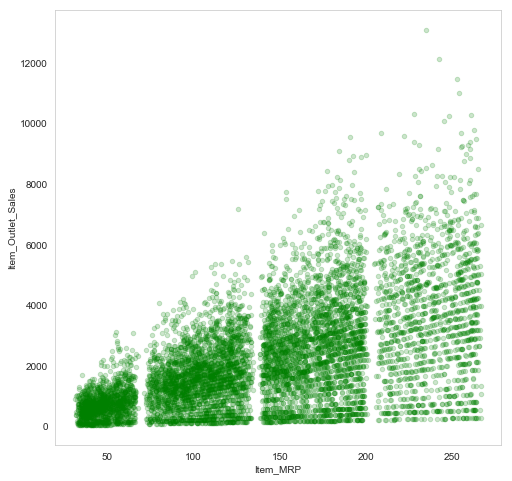

In [50]:
### Scatter PLot
df.plot.scatter(x='Item_MRP', y= 'Item_Outlet_Sales', color= 'green', animated = True, figsize = (8,8), alpha = 0.2)

From the above plot we note that  higher the price of the Item, more is the Item Outlet Sales. 

Customers buy expensive item more than the cheap ones.  

#### Item_Outlet_Sales - Outlet_Size

In [51]:
df[['Item_Outlet_Sales' , 'Outlet_Size']].describe()

,Item_Outlet_Sales
count,8523.000000
mean,2181.288914
std,1706.499616
min,33.290000
25%,834.247400
50%,1794.331000
75%,3101.296400
max,13086.964800


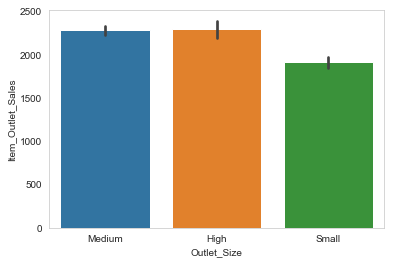

In [52]:
sns.barplot(y= 'Item_Outlet_Sales', x='Outlet_Size', data = df)

From the plot we observe that the Outlet Size affect the Sales Of the Item.
Higher the outlet size, more are the sales.

#### Item_Outlet Sales - Outlet_Type

In [53]:
df[['Item_Outlet_Sales', 'Outlet_Type']].describe()

,Item_Outlet_Sales
count,8523.000000
mean,2181.288914
std,1706.499616
min,33.290000
25%,834.247400
50%,1794.331000
75%,3101.296400
max,13086.964800


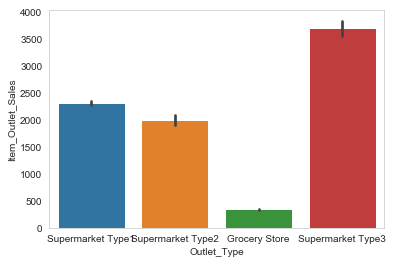

In [54]:
sns.barplot(y= 'Item_Outlet_Sales', x='Outlet_Type', data = df)

From the outlet Type we conclude that **Supermarket Type3** has highest number of sales and the **Grocery Store** has the lowest number of sales

#### Item_Weight -  Item_Outlet_Sales

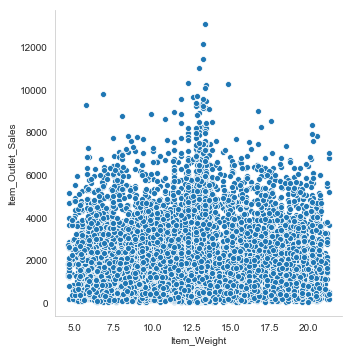

In [55]:
sns.relplot(x="Item_Weight", y="Item_Outlet_Sales", data=df,ci=None)

In [56]:
df[["Item_Weight", "Item_Outlet_Sales"]].describe()

,Item_Weight,Item_Outlet_Sales
count,8523.000000,8523.000000
mean,12.857890,2181.288914
std,4.232804,1706.499616
min,4.555000,33.290000
25%,9.310000,834.247400
50%,12.867061,1794.331000
75%,16.000000,3101.296400
max,21.350000,13086.964800


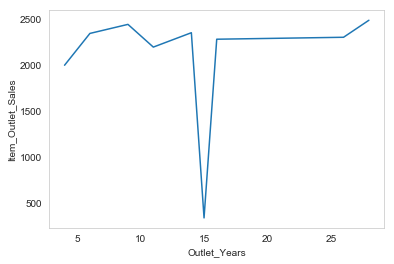

In [57]:
### Creating the Line plot to do Bivariate Analysis between 'Outlet_Years' & 'Item_Outlet_Sales'
sns.lineplot(x="Outlet_Years", y="Item_Outlet_Sales", data=df,ci=None)

In [58]:
df[["Outlet_Years","Item_Outlet_Sales"]].describe()

,Outlet_Years,Item_Outlet_Sales
count,8523.000000,8523.000000
mean,15.168133,2181.288914
std,8.371760,1706.499616
min,4.000000,33.290000
25%,9.000000,834.247400
50%,14.000000,1794.331000
75%,26.000000,3101.296400
max,28.000000,13086.964800


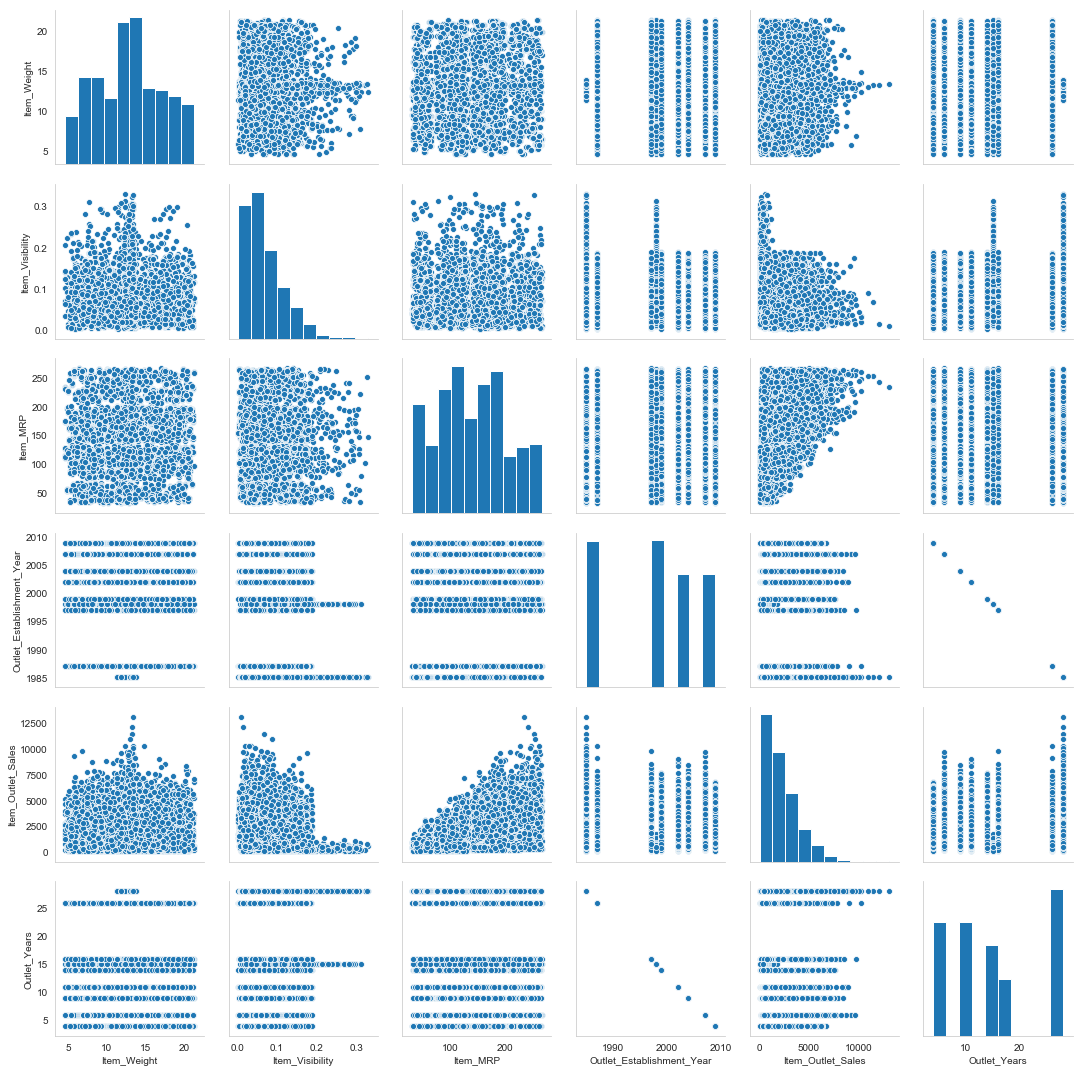

In [59]:
### Creating a pairplot to show the realtionships of data
sns.pairplot(df)

# MULTIVARIATE ANALYSIS

Let's now work upon some of the multivariate analysis.

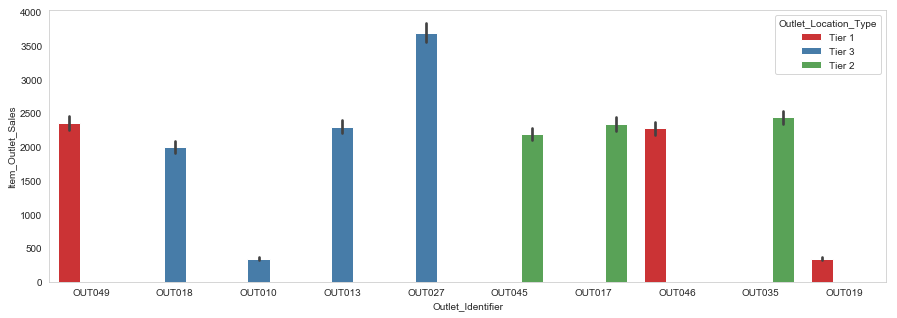

In [60]:
plt.figure(figsize = (15,5))
sns.barplot(x='Outlet_Identifier', y='Item_Outlet_Sales',hue='Outlet_Location_Type', data=df,palette='Set1')

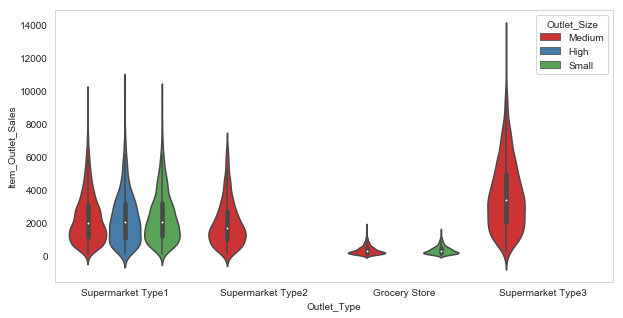

In [61]:
plt.figure(figsize = (10,5))
sns.violinplot(x='Outlet_Type', y='Item_Outlet_Sales',hue='Outlet_Size', data=df, palette="Set1")

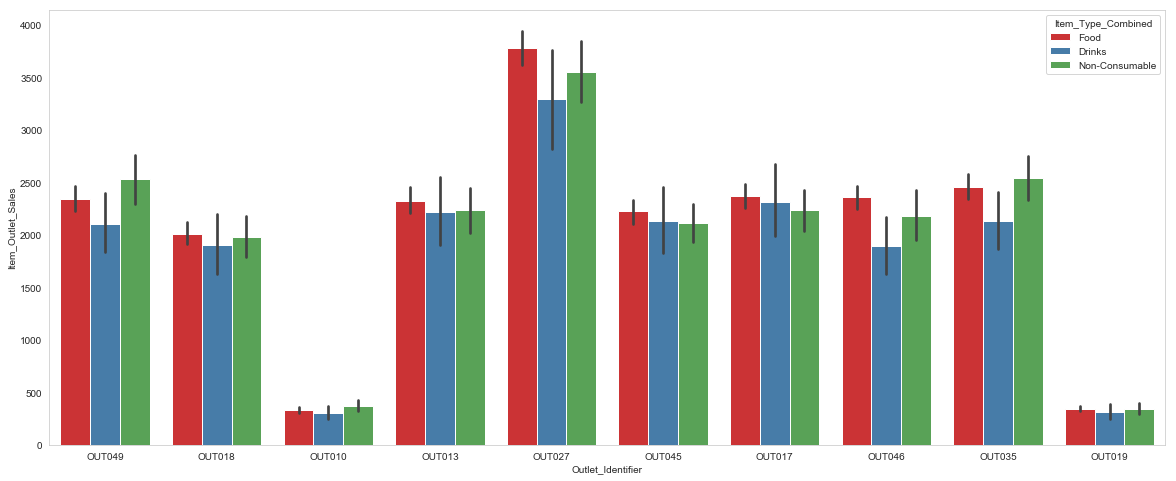

In [62]:
plt.figure(figsize = (20,8))
sns.barplot(x='Outlet_Identifier', y='Item_Outlet_Sales',hue='Item_Type_Combined', data=df,palette='Set1')

## CONCLUSION

With this dataset we understand the  properties of products and stores which play a key role in increasing sales and use the Information to take the correct measures which could help their business to grow. 
We found that most of the outlet types are supermarket and higher number of sales are in Tier3 cities. We came to know that higher the price of the Items, more the sale of those products. This play a key role in increasing sales and help their business to grow. 